In [22]:
import matplotlib.pyplot as plt
import pandas as pd

#### Questions

1. **How many columns are in the dataset? What does each column represent?**
   - *Hint: Use `df.head(5)` or `df.info()` or `df.columns` to check the number of columns and their names.*

2. **How many rows are in the dataset? What does each row represent?**
   - *Hint: Use `df.shape` to find the number of rows. Think about what a single row of data indicates in the context of this dataset.*
   
3. **How many unique cities/towns are in Massachusetts in this dataset?**
   - *Hint: Use `len(df['City_Town'].unique())` to find the answer. The result should be 351.*

In [23]:
### Loading/Reading data**
df_raw = pd.read_csv('2020_President_MA.csv')

## show the first 5 rows
df_raw.head(5)

## show the last 5 rows
df_raw.tail(5)

,City/Town,Unnamed: 1,Unnamed: 2,"Joseph R. Biden, Jr.",Donald J. Trump,Jo Jorgensen,Howard Hawkins,All Others,No Preference,Blanks,Total Votes Cast
348,Worcester,NaN,NaN,"48,584","21,169",830,459,328,0.0,626,"71,996"
349,Worthington,NaN,NaN,571,271,17,9,2,0.0,6,876
350,Wrentham,NaN,NaN,"4,247","3,319",132,34,75,0.0,50,"7,857"
351,Yarmouth,NaN,NaN,"9,149","5,993",190,69,51,0.0,110,"15,562"
352,TOTALS,NaN,NaN,"2,382,202","1,167,202","47,013","18,658","16,327",0.0,"26,603","3,658,005"


In [24]:
## Cleaning data. Check nan vlaues 
df_raw.isna().sum()

## Which columns/rows have missing values? Hint: We should remove two rows and two columns here. 


City/Town                 1
Unnamed: 1              353
Unnamed: 2              353
Joseph R. Biden, Jr.      0
Donald J. Trump           0
Jo Jorgensen              0
Howard Hawkins            0
All Others                1
No Preference             1
Blanks                    1
Total Votes Cast          1
dtype: int64

In [25]:
### Remove two rows and two columns: replace with the names of the columns
df_clean_cols = df_raw.drop(['Unnamed: 1', 'Unnamed: 2'], axis = 1)

### Remove the row (insert the row index) and check the results
df = df_clean_cols.drop([0, 352])
df.head(5)

,City/Town,"Joseph R. Biden, Jr.",Donald J. Trump,Jo Jorgensen,Howard Hawkins,All Others,No Preference,Blanks,Total Votes Cast
1,Abington,"5,209","4,236",146,45,24,0.0,75,"9,735"
2,Acton,"11,105","2,471",193,74,84,0.0,91,"14,018"
3,Acushnet,"2,664","3,290",73,30,11,0.0,58,"6,126"
4,Adams,"2,894","1,428",77,35,7,0.0,27,"4,468"
5,Agawam,"7,794","8,073",186,74,58,0.0,77,"16,262"


In [26]:
### Rename columnes for easy analysis
df.columns = ['City_Town', 'Biden', 'Trump', 'Jorgensen', 'Hawkins', 'Others', 'No_Prefer', 'Blanks', 'Total']
df.head(5)

,City_Town,Biden,Trump,Jorgensen,Hawkins,Others,No_Prefer,Blanks,Total
1,Abington,"5,209","4,236",146,45,24,0.0,75,"9,735"
2,Acton,"11,105","2,471",193,74,84,0.0,91,"14,018"
3,Acushnet,"2,664","3,290",73,30,11,0.0,58,"6,126"
4,Adams,"2,894","1,428",77,35,7,0.0,27,"4,468"
5,Agawam,"7,794","8,073",186,74,58,0.0,77,"16,262"


In [27]:
### Check number of towns and City in MA
### *Hint: Use `len(df['City_Town'].unique())` to find the answer. The result should be 351.*

num_towns_city = len(df['City_Town'].unique())
num_towns_city

351

In [28]:
## Before you do anything, remember to check the datatype and change if you need to
columns_to_convert = ['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'Others', 'Blanks', 'Total']

# Using pd.to_numeric to convert columns to numeric types
for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '') 
    df[column] = pd.to_numeric(df[column], errors='coerce')

# check the result again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 1 to 351
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City_Town  351 non-null    object 
 1   Biden      351 non-null    int64  
 2   Trump      351 non-null    int64  
 3   Jorgensen  351 non-null    int64  
 4   Hawkins    351 non-null    int64  
 5   Others     351 non-null    int64  
 6   No_Prefer  351 non-null    float64
 7   Blanks     351 non-null    int64  
 8   Total      351 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.8+ KB


## Statistical Analysis: Why am I removing the 'No_Prefer' column?
*** - *Hint: Consider the significance of the 'No_Prefer' data in the context of the analysis.*

## What observations can be made regarding Biden's vote distribution, given that the mean is approximately twice the median?
- *Hint: Reflect on what it indicates about the distribution of votes for Biden, such as potential skewness and the presence of outliers.*

In [29]:
## Statistical Analysis

df.describe()

,Biden,Trump,Jorgensen,Hawkins,Others,No_Prefer,Blanks,Total
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.0,351.000000,351.000000
mean,6786.900285,3325.361823,133.940171,53.156695,46.515670,0.0,75.792023,10421.666667
std,14549.766509,3858.080431,175.307206,95.514313,95.230002,0.0,137.390162,18309.434966
min,28.000000,16.000000,1.000000,0.000000,0.000000,0.0,0.000000,60.000000
25%,1560.000000,789.500000,38.000000,14.000000,6.000000,0.0,14.500000,2562.000000
50%,3520.000000,2474.000000,102.000000,31.000000,26.000000,0.0,44.000000,6453.000000
75%,8381.500000,4373.500000,179.000000,65.000000,58.500000,0.0,91.000000,13794.000000
max,242717.000000,45425.000000,2603.000000,1484.000000,1567.000000,0.0,1608.000000,295297.000000


#### Questions

1. **What percentage of the total votes did each candidate receive across all cities/towns?**
   - *Hint: Use `vote_percentages = (df[['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'Others']].sum() / df[['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'Others']].sum().sum()) * 100` to calculate the percentage of total votes for each candidate.*   

2. **Which city/town had the highest total number of votes cast?**
   - *Hint: Use `df.loc[df['Total'].idxmax()]` to find the city/town with the highest total votes.*

3. **What is the average number of votes received by each candidate across all cities/towns?**
   - *Hint: Use `df[['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'Others']].mean()` to find the average votes per candidate.*

4. **How many cities/towns had more than 50% of the total votes for Biden?**
   - *Hint: Use `df[df['Biden'] / df['Total'] > 0.5].shape[0]` to count the number of cities/towns.*

5. **What is the distribution of Trump votes across all cities/towns?**
   - *Hint: Use `df['Trump'].describe()` to analyze the distribution of Trump votes.*

6. **Which candidate received the most votes in the city/town with the lowest voter turnout?**
   - *Hint: Identify the city/town with the lowest `Total` votes, then check the vote counts for each candidate in that row.*

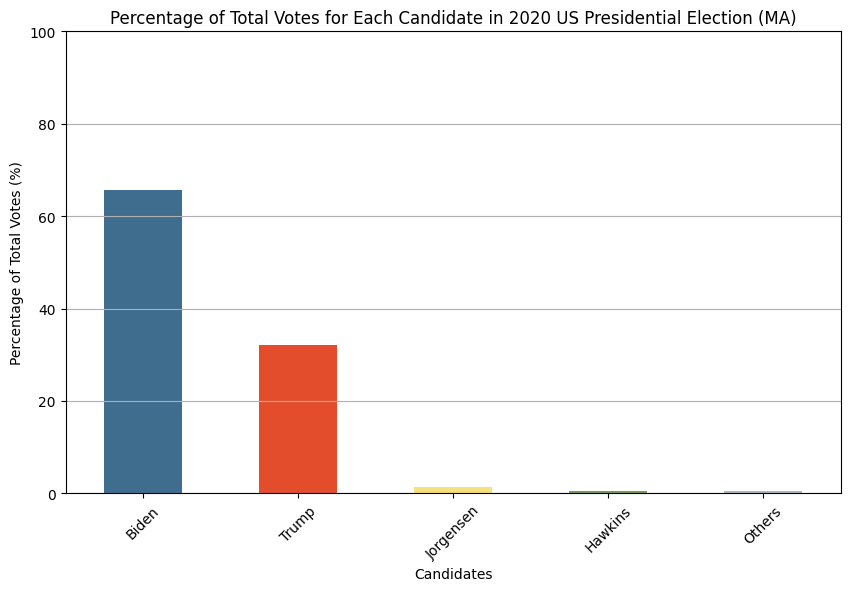

In [30]:
# Calculate the total votes for each candidate
total_votes = df[['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'Others']].sum()

# Calculate the total votes across all candidates
total_votes_sum = total_votes.sum()

# Calculate percentage for each candidate
vote_percentages = (total_votes / total_votes_sum) * 100

# Plotting
plt.figure(figsize=(10, 6))
vote_percentages.plot(kind='bar', color=['#3E6D8D', '#E44D2C', '#F6E17C', '#7C9B4A', '#A8B9C8'])
plt.title('Percentage of Total Votes for Each Candidate in 2020 US Presidential Election (MA)')
plt.xlabel('Candidates')
plt.ylabel('Percentage of Total Votes (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.grid(axis='y')

## does this graph represent your understanding about US Election in MA?

In [31]:
df.loc[df['Total'].idxmax()]

City_Town    Boston
Biden        242717
Trump         45425
Jorgensen      2603
Hawkins        1484
Others         1567
No_Prefer       0.0
Blanks         1501
Total        295297
Name: 36, dtype: object

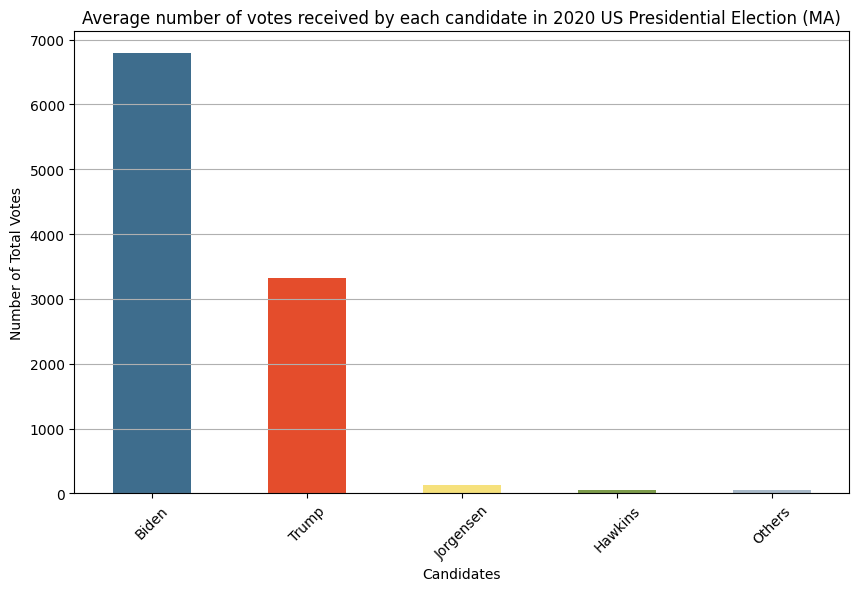

In [35]:
avg_voters = df[['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'Others']].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_voters.plot(kind='bar', color=['#3E6D8D', '#E44D2C', '#F6E17C', '#7C9B4A', '#A8B9C8'])
plt.title('Average number of votes received by each candidate in 2020 US Presidential Election (MA)')
plt.xlabel('Candidates')
plt.ylabel('Number of Total Votes')
plt.xticks(rotation=45)
#plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.grid(axis='y')

In [37]:
df[df['Biden'] / df['Total'] > 0.5].shape

(284, 9)